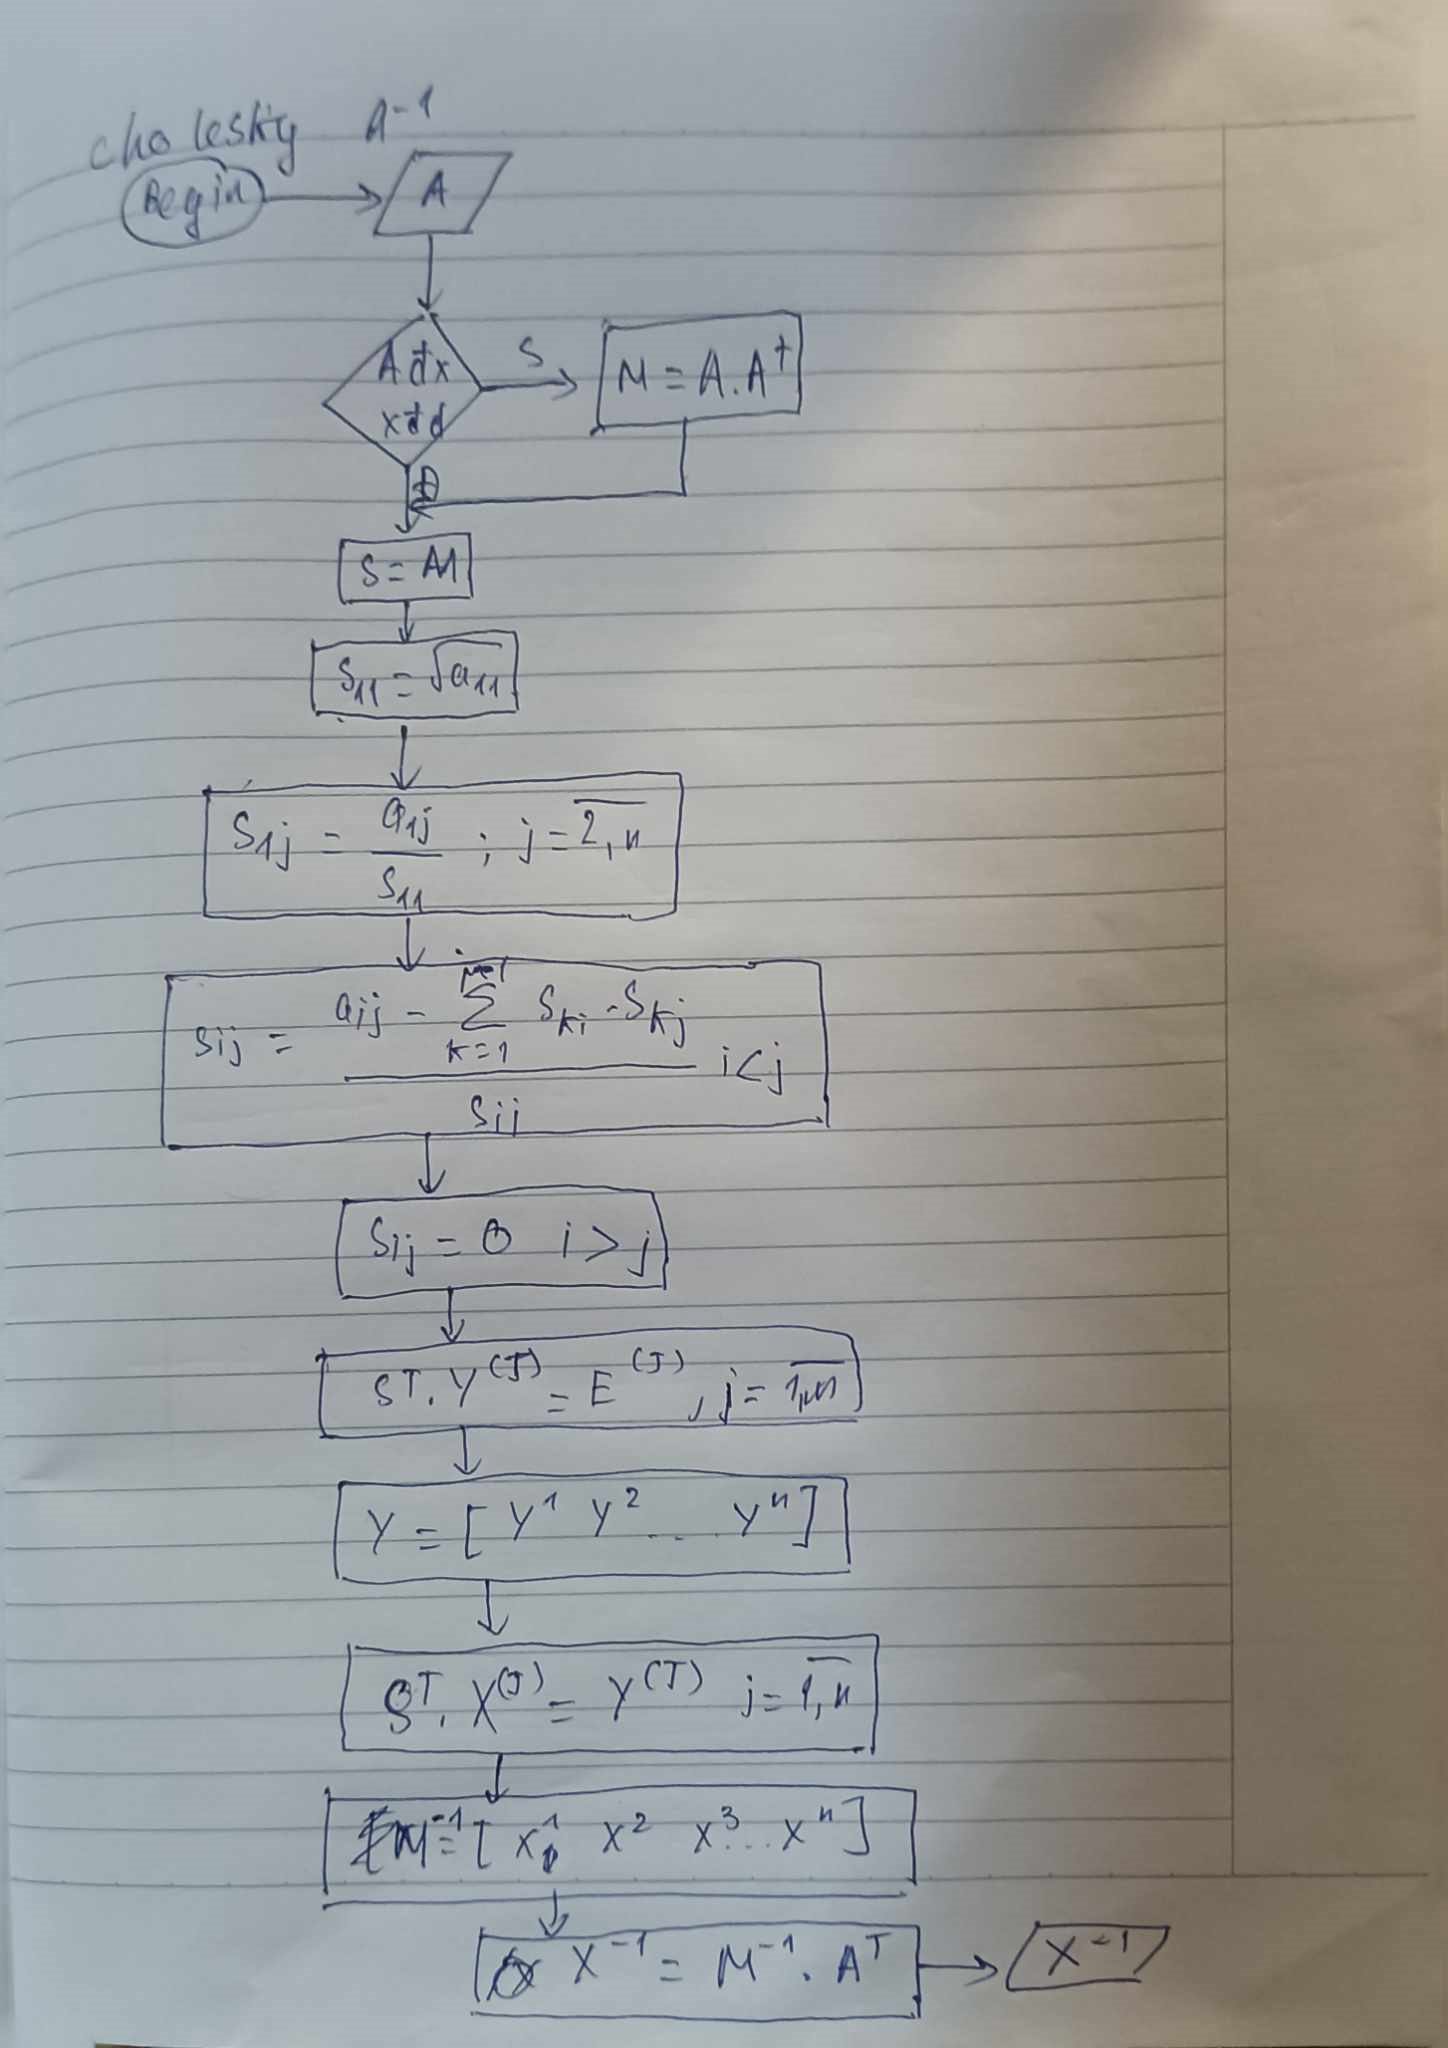

$S.Y^i=E^i$  



<font size=6>$Y[k,i] = \frac{I[k, i] - \sum_{j=0}^{k-1} S[k, j] \cdot y[j]}{S[k, k]}$



$S^T.X^i=Y^i$  


<font size=6> $X[k,i] = \frac{\text{Y}[k, i] - \sum_{j=k+1}^{n-1} S^T[k, j] \cdot x[j]}{S^T[k, k]}$


In [4]:
import numpy as np

def symmetrize_and_ensure_positive_definite(A):
    epsilon = 1e-8  # Một số rất nhỏ để đảm bảo tính xác định dương
    M = np.dot(A.T, A) + epsilon * np.eye(A.shape[1])
    return M

import numpy as np

def cholesky_decomposition(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    
    print("Bắt đầu phân rã Cholesky:")
    for i in range(n):
        for j in range(i+1):
            if i == j:
                L[i, j] = np.sqrt(A[i, i] - np.sum(L[i, :j]**2))
            else:
                L[i, j] = (A[i, j] - np.sum(L[i, :j] * L[j, :j])) / L[j, j]
            print(f"L[{i+1},{j+1}] = {L[i,j]}")
    
    print("Kết quả phân rã Cholesky (S):")
    print(L)
    return L

def cholesky_inverse(A):
    n = A.shape[0]
    L = cholesky_decomposition(A)
    inv_L = np.zeros_like(L)
    inv_LT = np.zeros_like(L)

    # Giải LX = I (Forward substitution)
    I = np.eye(n)
    for i in range(n):
        y = np.zeros(n)
        for k in range(n):
            y[k] = (I[k, i] - np.dot(L[k, :k], y[:k])) / L[k, k]
        inv_L[:, i] = y

    print("\nKết quả của Y sau khi giải S.Y = I:")
    print(inv_L)

    # Giải L^TX = inv_L (Backward substitution)
    for i in range(n):
        x = np.zeros(n)
        for k in range(n-1, -1, -1):
            x[k] = (inv_L[k, i] - np.dot(L.T[k, k+1:], x[k+1:])) / L.T[k, k]
        inv_LT[:, i] = x

    print("\nKết quả của X sau khi giả S..X = Y :")
    print(inv_LT)

    A_inv = inv_LT

    print("\nMa trận nghịch đảo A^(-1):")
    print(A_inv)
    
    return A_inv


# Ví dụ sử dụng
A = np.array([[2, 1, 0.1, 1],
              [0.4, 0.5, 4, -8.5],
              [0.3, -1, 1, 5.2],
              [1, 0.2, 2.5, -1]], dtype=float)

# Chuyển đổi A thành ma trận đối xứng xác định dương
M = symmetrize_and_ensure_positive_definite(A)
print("\nMa trận đối xứng xác định dương M:")
print(M)

# Tìm ma trận nghịch đảo
M = cholesky_inverse(M)
print("\nMa trận nghịch đảo A^(-1) = M-1@A.T")
A_inv = M@A.T

print("\nMa trận nghịch đảo A^(-1):")
print(A_inv)
    


Ma trận đối xứng xác định dương M:
[[  5.25000001   2.1          4.6         -0.84      ]
 [  2.1          2.29000001   1.6         -8.65      ]
 [  4.6          1.6         23.26000001 -31.2       ]
 [ -0.84        -8.65       -31.2        101.29000001]]
Bắt đầu phân rã Cholesky:
L[1,1] = 2.291287849660099
L[2,1] = 0.9165151381182965
L[2,2] = 1.2041594626958674
L[3,1] = 2.0076045882591256
L[3,2] = -0.19930914794119306
L[3,3] = 4.380616359685914
L[4,1] = -0.36660605524731865
L[4,2] = -6.904401167953826
L[4,3] = -7.2684087582401
L[4,4] = 0.8093692886145736
Kết quả phân rã Cholesky (S):
[[ 2.29128785  0.          0.          0.        ]
 [ 0.91651514  1.20415946  0.          0.        ]
 [ 2.00760459 -0.19930915  4.38061636  0.        ]
 [-0.36660606 -6.90440117 -7.26840876  0.80936929]]

Kết quả của Y sau khi giải S^t.Y = I:
[[ 0.43643578  0.          0.          0.        ]
 [-0.33218192  0.8304548   0.          0.        ]
 [-0.21512894  0.03778401  0.22827838  0.        ]
 [-4.56795

## thư viện

In [6]:
A = np.array([[2, 1, 0.1, 1],
              [0.4, 0.5, 4, -8.5],
              [0.3, -1, 1, 5.2],
              [1, 0.2, 2.5, -1]], dtype=float)
np.linalg.inv(A)

array([[ 1.64683513,  1.70673863,  1.797105  , -3.51549722],
       [-1.89370707, -2.83161596, -3.13726693,  5.8612406 ],
       [-0.64156035, -0.66241413, -0.62561335,  1.73577036],
       [-0.33580716, -0.51561989, -0.39438175,  0.99617681]])